In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [537]:
data=pd.read_csv(r"/content/logistic_regression.csv")

In [538]:
data.shape

(396030, 27)

In [539]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

There are 15 object type columns and 12 float type columns

> Add blockquote




[Text(0, 0, '15'), Text(0, 0, '12')]

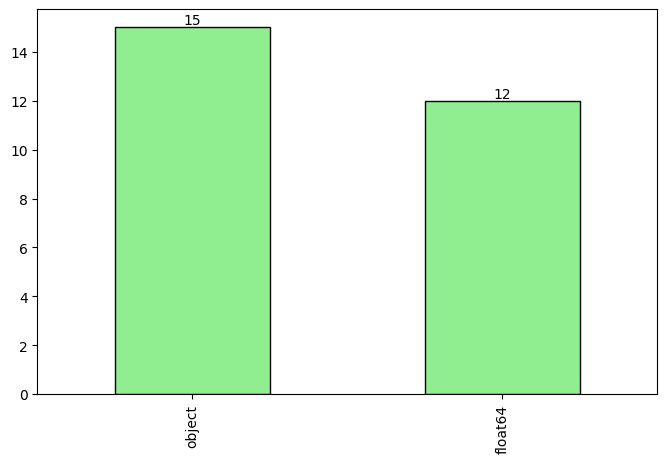

In [541]:
fig,axes=plt.subplots(1,figsize=(8,5))

data.dtypes.value_counts().plot(kind='bar',edgecolor='black',color='lightgreen',ax=axes)
axes.bar_label(axes.containers[0],fmt="%0.f")

Data in loan staus column is imbalance

<Axes: ylabel='count'>

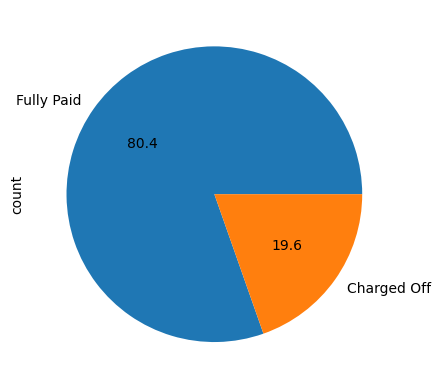

In [542]:
data['loan_status'].value_counts().plot(kind='pie',autopct='%0.1f',color='skyblue')

In [543]:
data.duplicated()  # checking the duplicate columns

,0
0,False
1,False
2,False
3,False
4,False
...,...
396025,False
396026,False
396027,False
396028,False


In [544]:
def show_detail(x):  # This function show the detail of numeric type column
 data_name=x
 x=data[x]
 print(f"there are {x.isnull().sum()} null values in {data_name} column") if x.isnull().sum() else print(f"there is no null value in {data_name} column")
 print(f"Skewness of the data {x.skew()}\n\n")


 fig,axes=plt.subplots(1,3,figsize=(15,4))
 x.describe().plot(kind='bar',color='skyblue',edgecolor='black',ax=axes[0])
 axes[0].bar_label(axes[0].containers[0],fmt='%.f')
 x.plot(kind='kde',color='red',ax=axes[1])
 x.plot(kind='box',color='lightcoral')

 axes[0].set_title(f"Summary Statistics of {data_name} ")
 axes[1].set_title(f"Data density of {data_name} ")
 axes[2].set_title(f"Outliers in {data_name} Data ")

 plt.show()


In [545]:
categorical_data=data.select_dtypes(exclude='number')

In [546]:
categorical_data.describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


<Axes: ylabel='count'>

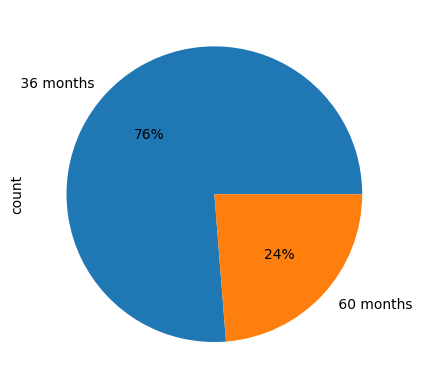

In [547]:
data['term'].value_counts().plot(kind='pie',autopct='%.f%%')

<Axes: xlabel='loan_status'>

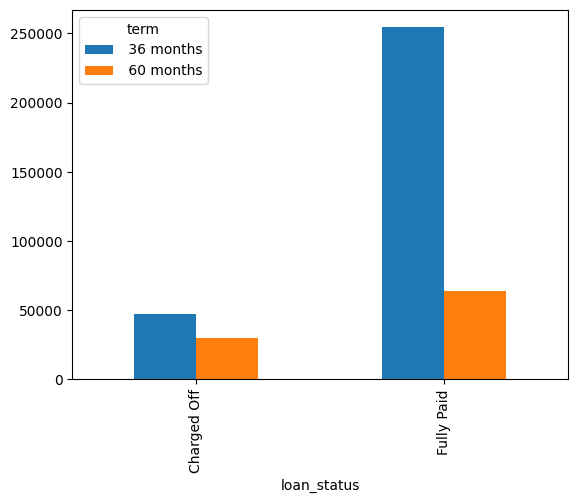

In [548]:
pd.crosstab(data['loan_status'],data['term']).plot(kind='bar')

0


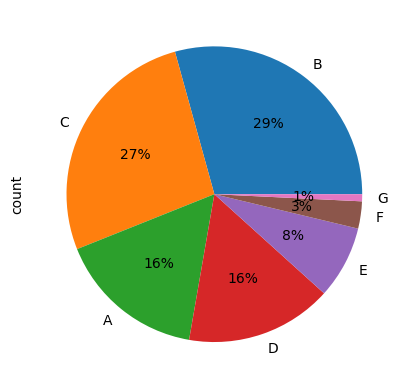

In [549]:
data['grade'].value_counts().plot(kind='pie',autopct='%.f%%')
print(data['grade'].isnull().sum())

conclusion - Most of the B grade have fully paid

<Axes: xlabel='loan_status'>

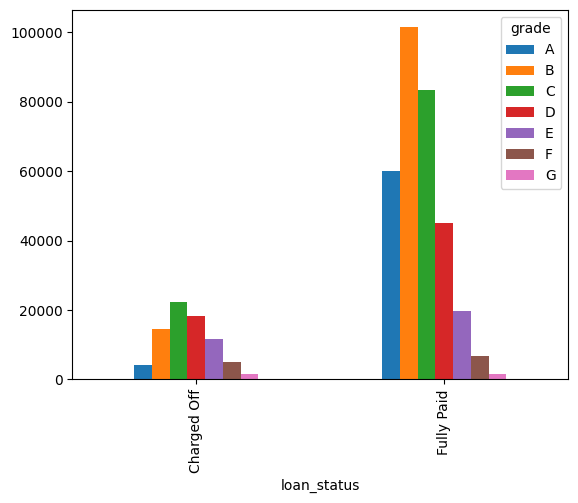

In [550]:
pd.crosstab(data['loan_status'],data['grade']).plot(kind='bar')


0


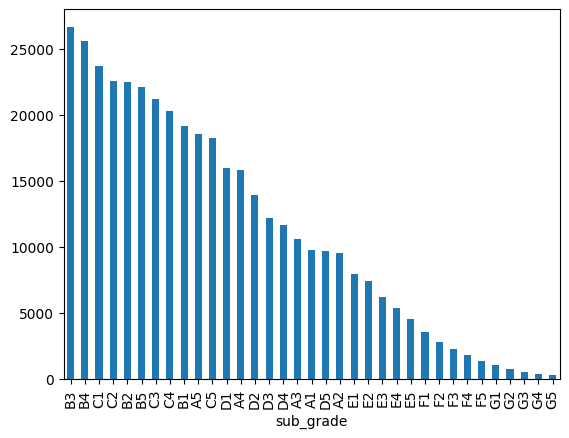

In [551]:
data['sub_grade'].value_counts().plot(kind='bar')
print(data['sub_grade'].isnull().sum())

<Axes: xlabel='sub_grade'>

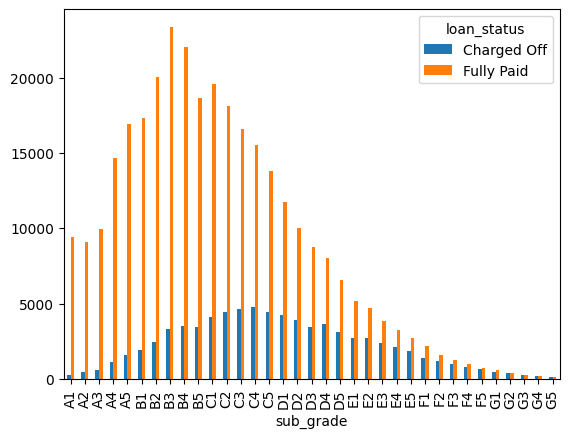

In [552]:
pd.crosstab(data['sub_grade'],data['loan_status']).plot(kind='bar')

In [553]:
def show_object_detail(x,y):

 x=data[x]
 y=data[y]
 print(f"there are {x.isnull.sum()} null values\n\n") if x.isnull().sum() else print(" there is no null values \n\n")
 x.value_counts().plot(kind='pie',autopct='%.f%%')
 pd.crosstab(x,y,normalize='columns').plot(kind='bar')

 there is no null values 




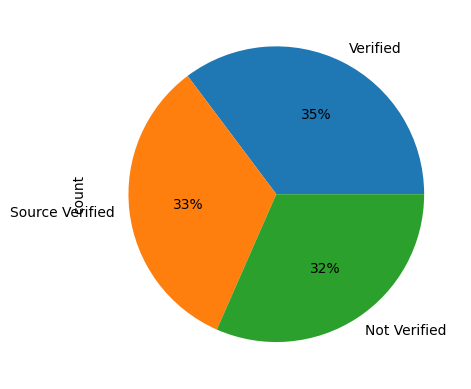

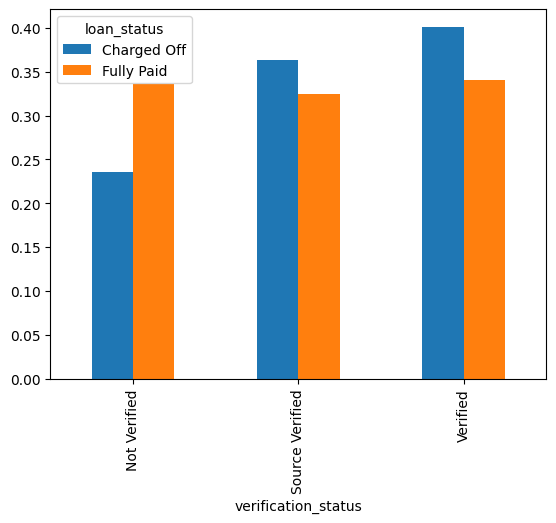

In [554]:
show_object_detail('verification_status','loan_status')

 there is no null values 




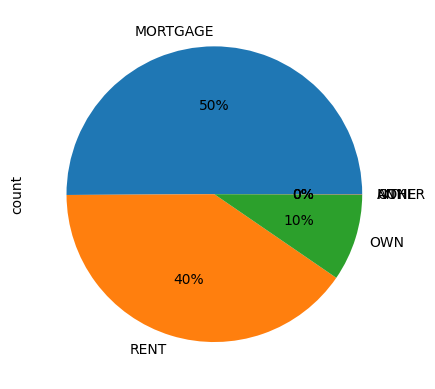

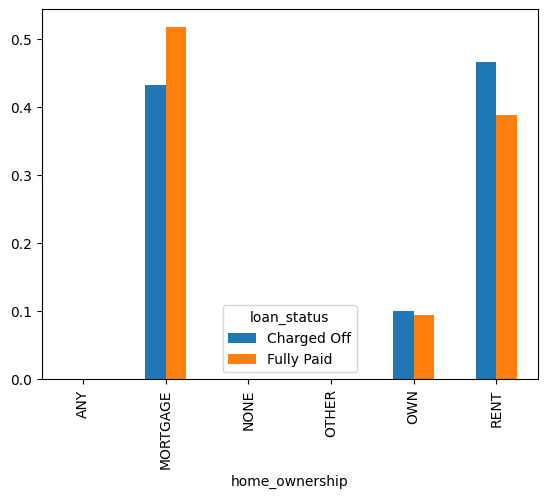

In [555]:
show_object_detail('home_ownership','loan_status')

 there is no null values 




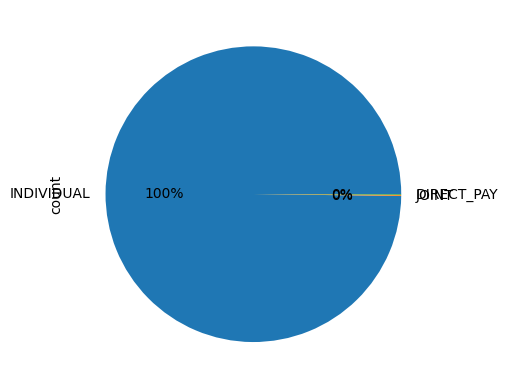

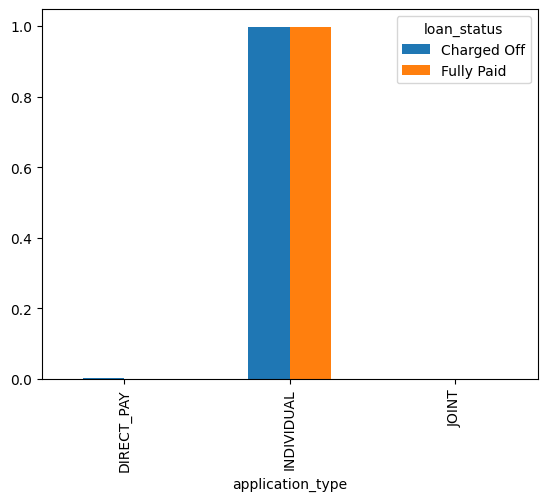

In [556]:
show_object_detail('application_type','loan_status')

Some mix object type has null values

In [557]:
categorical_data.isnull().sum()

,0
term,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
verification_status,0
issue_d,0
loan_status,0
purpose,0


In [558]:
contain_null=['emp_title','emp_length','title']

In [559]:
data['emp_title'].head()
data['emp_title']=data['emp_title'].fillna('Unemployed')  # filling the null values of emp_title columns with Unemployement


In [560]:
data['emp_length'].head()

,emp_length
0,10+ years
1,4 years
2,< 1 year
3,6 years
4,9 years


<Axes: xlabel='emp_length'>

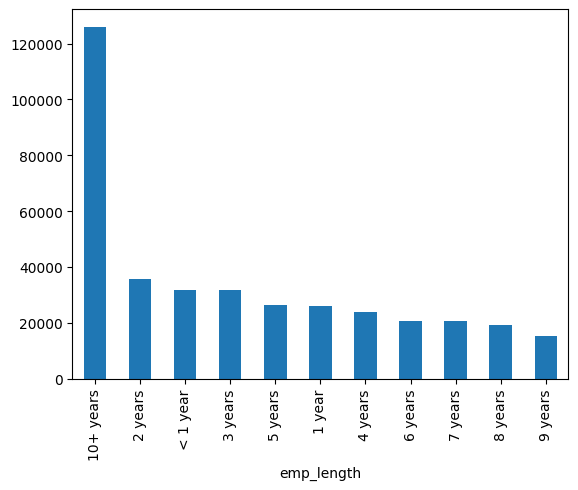

In [561]:
data['emp_length'].value_counts().plot(kind='bar')

<Axes: xlabel='emp_length'>

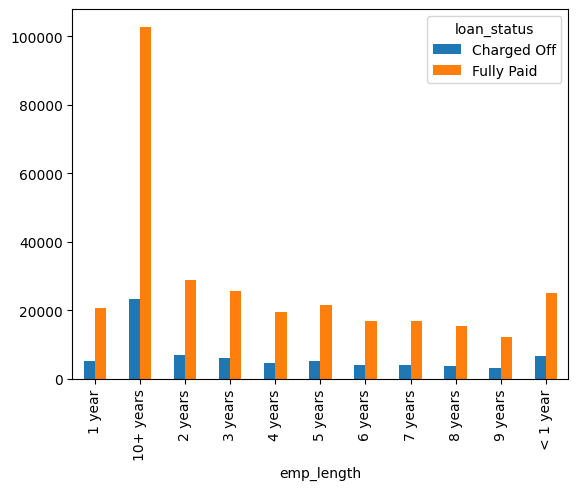

In [562]:
pd.crosstab(data['emp_length'],data['loan_status']).plot(kind='bar')

In [563]:
data['emp_length'].isnull().sum()

18301

In [568]:
data['emp_length']=data['emp_length'].fillna('10+ years')

In [569]:
numeric_data.isnull().sum()

,0
loan_amnt,0
int_rate,0
installment,0
annual_inc,0
dti,0
open_acc,0
pub_rec,0
revol_bal,0
revol_util,276
total_acc,0


In [570]:
null_numeric_data=['revol_util','mort_acc','pub_rec_bankruptcies']

<Axes: ylabel='Density'>

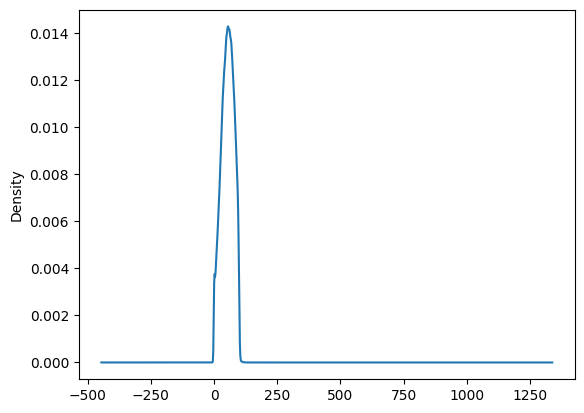

In [571]:
data['revol_util'].plot(kind='kde')

In [573]:
data[data['revol_util']>150]=150

<Axes: ylabel='Density'>

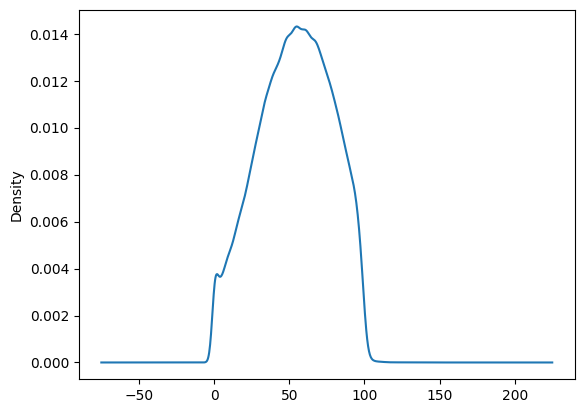

In [574]:
data['revol_util'].plot(kind='kde')


<Axes: >

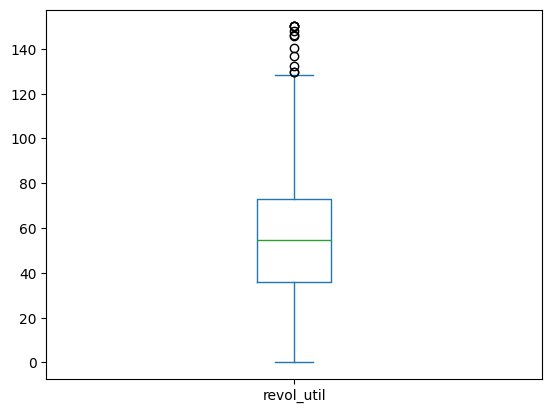

In [575]:
data['revol_util'].plot(kind='box')

In [576]:
data['revol_util'].isnull().sum()

276

In [577]:
data['revol_util'].describe()

,revol_util
count,395754.000000
mean,53.789857
std,24.416254
min,0.000000
25%,35.800000
50%,54.800000
75%,72.900000
max,150.000000


In [578]:
data['revol_util']=data['revol_util'].fillna(55)

In [579]:
data['mort_acc'].describe()

,mort_acc
count,358235.000000
mean,1.815635
std,2.204246
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,150.000000


Conclusion : mort_account columns is containing some outliers eleminate outliers with a thresh hold value which is 6.5 and fill the null values with 0

<Axes: >

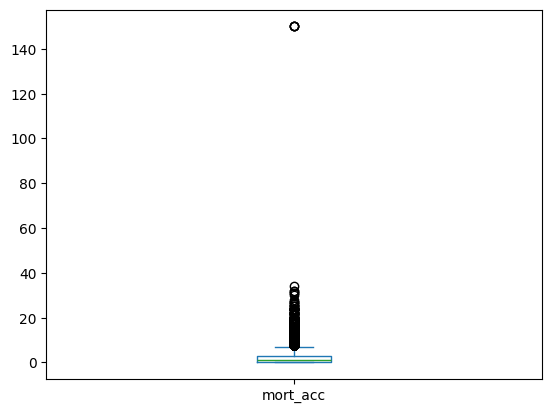

In [580]:
data['mort_acc'].plot(kind='box')


<Axes: xlabel='mort_acc'>

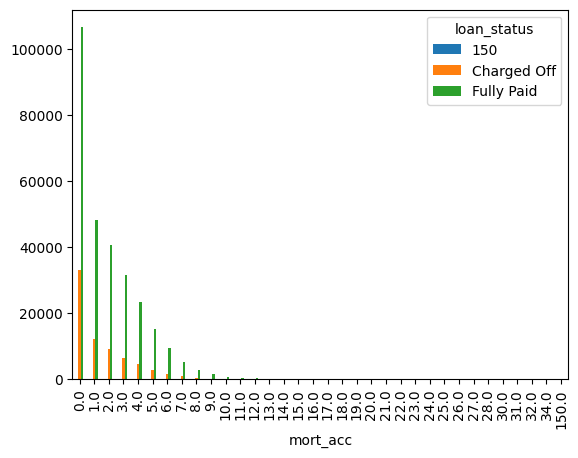

In [581]:
pd.crosstab(data['mort_acc'],data['loan_status']).plot(kind='bar')

In [582]:
data[data['mort_acc']>9]=9

<Axes: xlabel='mort_acc'>

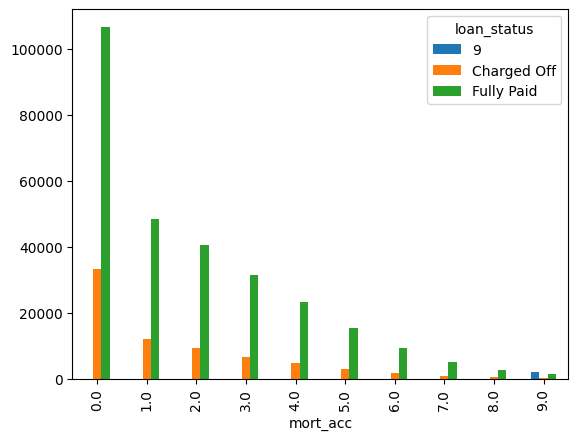

In [583]:
pd.crosstab(data['mort_acc'],data['loan_status']).plot(kind='bar')

In [584]:
mort_acc=data['mort_acc']

In [585]:
mort_acc[mort_acc>6.5]=6.5   # removing the outliers


<ipython-input-585-2e163bacd554>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_acc[mort_acc>6.5]=6.5   # removing the outliers


<Axes: >

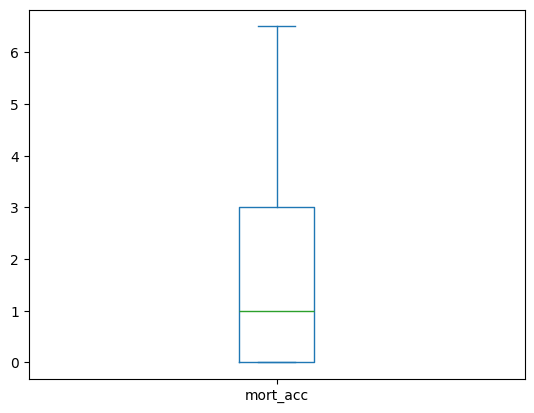

In [586]:
mort_acc.plot(kind='box')

<Axes: xlabel='mort_acc'>

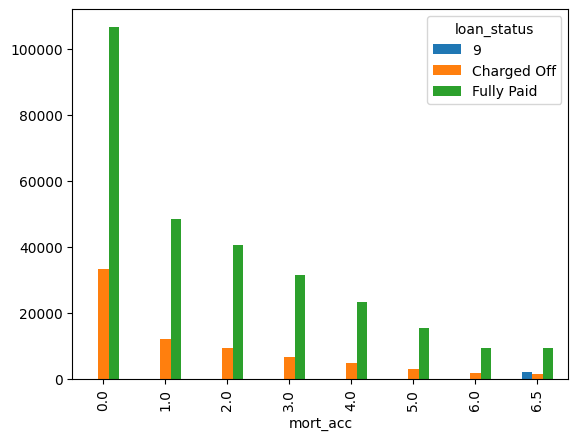

In [587]:
pd.crosstab(mort_acc,data['loan_status']).plot(kind='bar')

In [588]:
mort_acc.isnull().sum()

37795

In [589]:
data['mort_acc']=data['mort_acc'].fillna(0)

<Axes: >

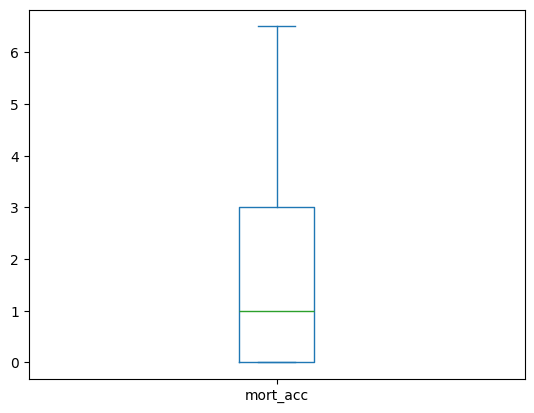

In [590]:
data['mort_acc'].plot(kind='box')


In [591]:
data['pub_rec_bankruptcies'].describe()

,pub_rec_bankruptcies
count,395495.000000
mean,0.167780
std,0.732269
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


<Axes: xlabel='pub_rec_bankruptcies'>

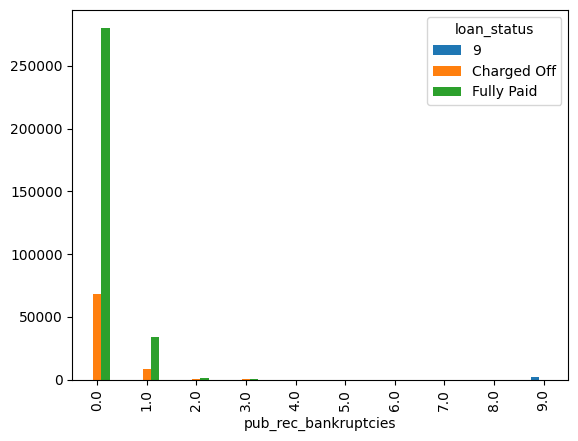

In [592]:
pd.crosstab(data['pub_rec_bankruptcies'],data['loan_status']).plot(kind='bar')

In [593]:
data['pub_rec_bankruptcies']=data['pub_rec_bankruptcies'].fillna(0)   # fill the null values with 0
data[data['pub_rec_bankruptcies']>2]=2  # removing outliers with threshold

In [594]:
categorical_data.isnull().sum()

,0
term,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
verification_status,0
issue_d,0
loan_status,0
purpose,0


In [595]:
data['title'].head()

,title
0,Vacation
1,Debt consolidation
2,Credit card refinancing
3,Credit card refinancing
4,Credit Card Refinance


In [596]:
data['title'].isnull().sum()

1748

In [597]:
data['title']=data['title'].fillna('other')

<Axes: xlabel='application_type'>

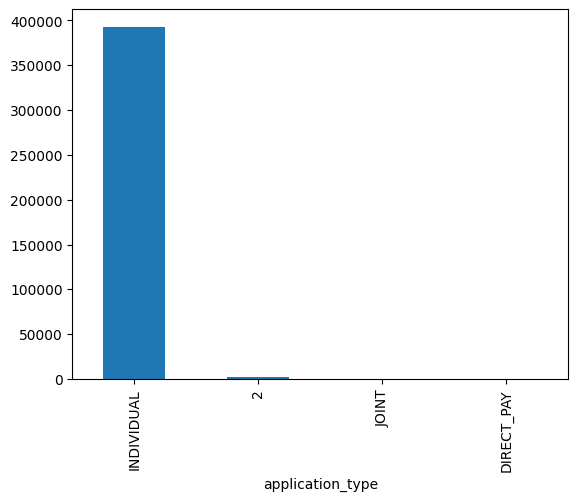

In [598]:
data['application_type'].value_counts().plot(kind='bar')

In [599]:
data['application_type']=data['application_type'].fillna('JOINT')

<Axes: xlabel='initial_list_status'>

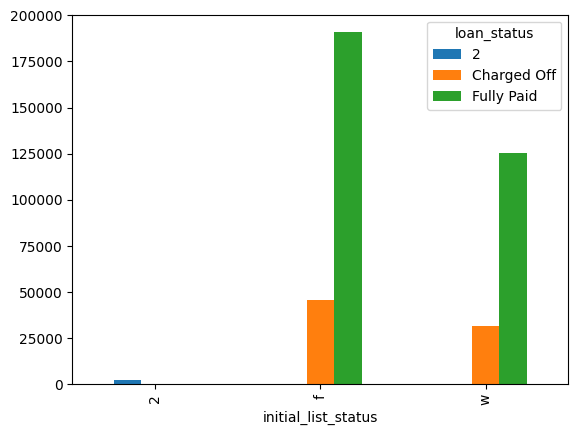

In [600]:
pd.crosstab(data['initial_list_status'],data['loan_status']).plot(kind='bar')

In [601]:
data['initial_list_status']=data['initial_list_status'].fillna('f')

In [602]:
data.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [603]:
data['address']=data['address'].fillna('Sabrina')

<Axes: ylabel='Density'>

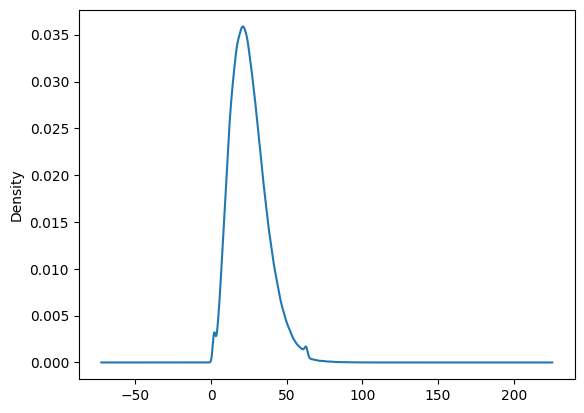

In [604]:
data['total_acc'].plot(kind='kde')

In [605]:
data['total_acc'].describe()

,total_acc
count,396030.000000
mean,25.179752
std,11.945614
min,2.000000
25%,17.000000
50%,24.000000
75%,32.000000
max,151.000000


<Axes: >

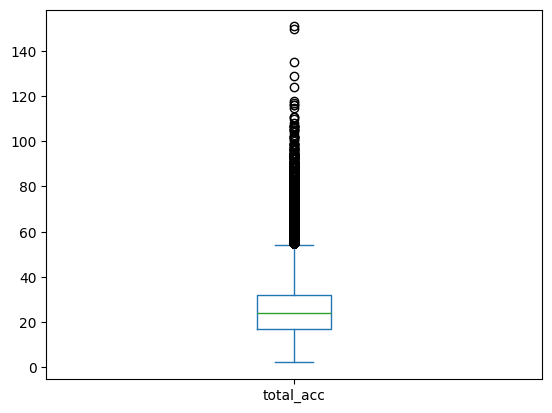

In [606]:
data['total_acc'].plot(kind='box')

In [607]:
data[data['total_acc']>50]=50  # eleminating the outliers

<Axes: >

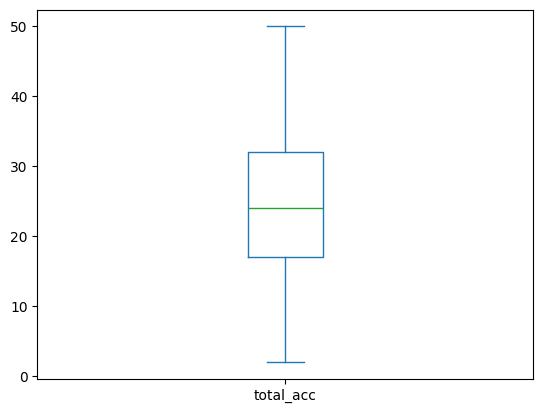

In [608]:
data['total_acc'].plot(kind='box')

In [609]:
data['total_acc']=data['total_acc'].fillna(data['total_acc'].mean())

In [610]:
data.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [611]:
numeric_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [612]:
filtered_rows = data[(data['loan_amnt'] > 35000) & (data['loan_status'] == "Fully Paid")]


In [613]:
print(len(filtered_rows))

225


In [614]:
lower_percentile = data['loan_amnt'].quantile(0.01)  # 1st percentile
upper_percentile = data['loan_amnt'].quantile(0.95)  # 99th percentile

# Replace outliers
data['loan_amnt'] = data['loan_amnt'].clip(lower=lower_percentile, upper=upper_percentile)


Conclusion : Loan_amnt wast conaining many outliers and highly skewed after performing normalization Loan_amnt column ready to feed machine model

there is no null value in loan_amnt column
Skewness of the data 0.4982736741959607




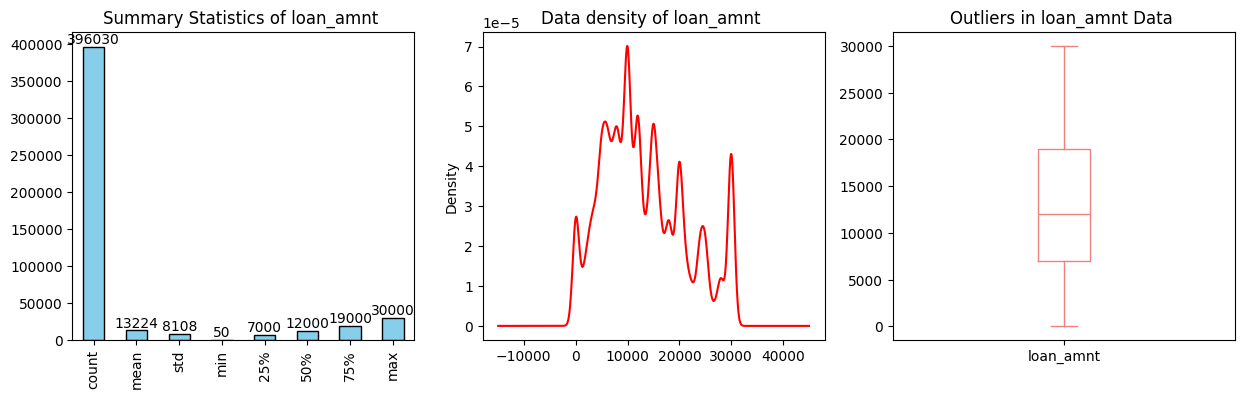

In [615]:
show_detail('loan_amnt')

<ipython-input-616-e9cf1b1af229>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='loan_amnt', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


<Axes: xlabel='loan_amnt', ylabel='Density'>

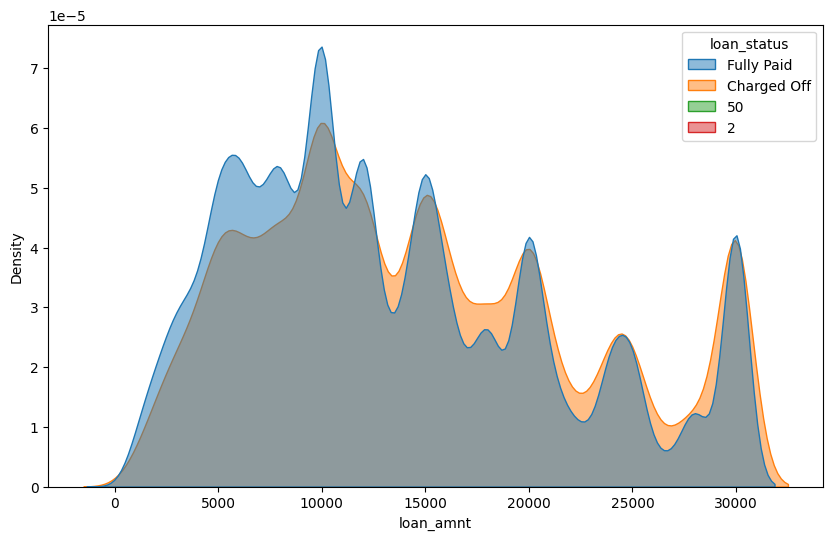

In [616]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='loan_amnt', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


there is no null value in int_rate column
Skewness of the data 2.837278572690884




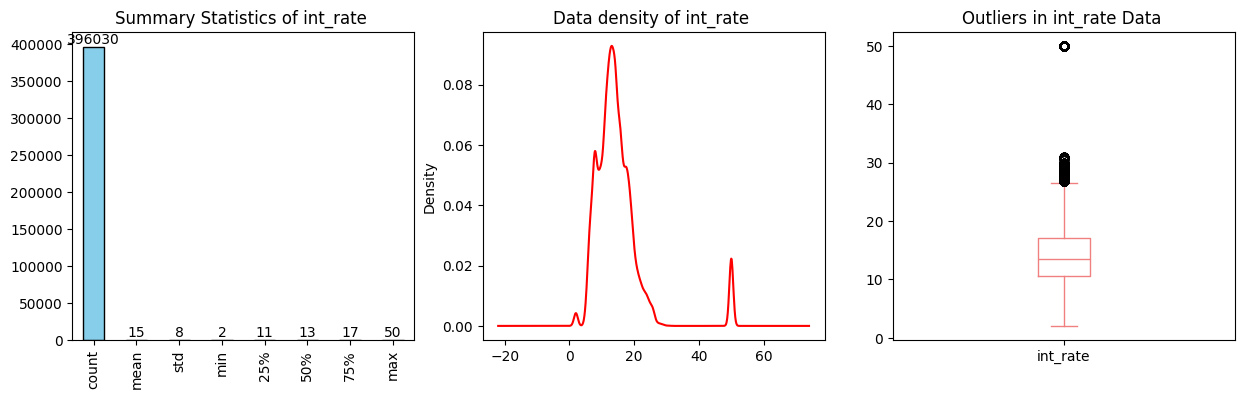

In [617]:
# analyze the int_rate column
show_detail('int_rate')

Normalization of int_rate column

In [618]:
lower_percentile = data['int_rate'].quantile(0.01)  # 1st percentile
upper_percentile = data['int_rate'].quantile(0.95)  # 99th percentile

# Replace outliers
data['int_rate'] = data['int_rate'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in int_rate column
Skewness of the data 0.4255412323220325




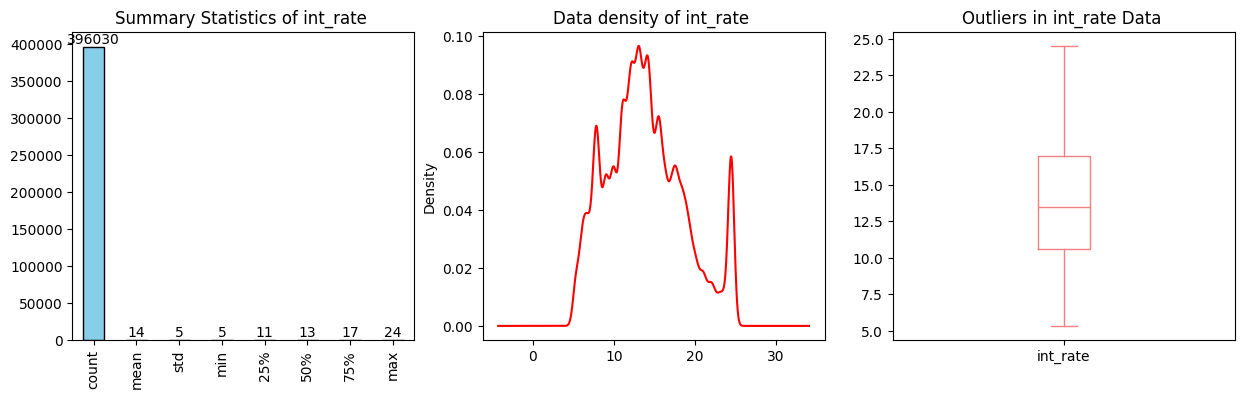

In [619]:
show_detail('int_rate')

there is no null value in installment column
Skewness of the data 0.9241222694234719




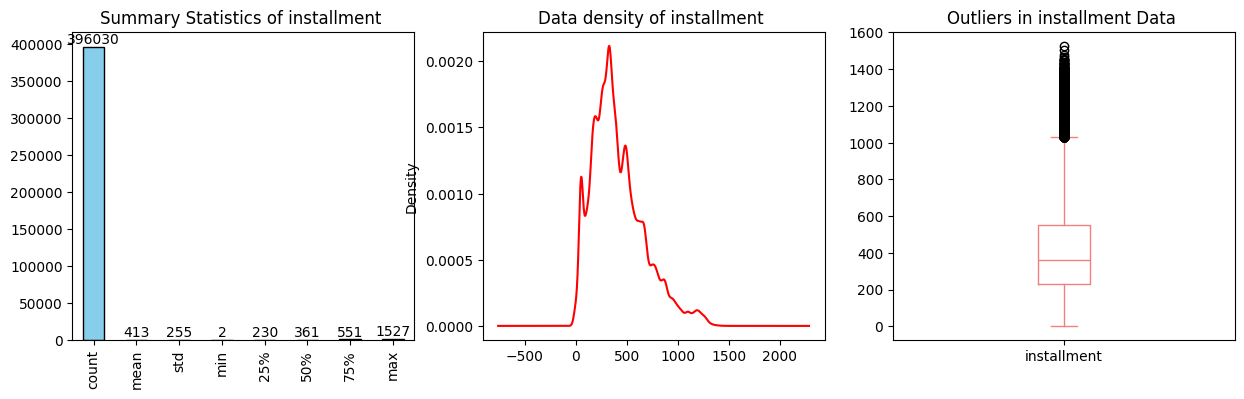

In [620]:
# showing the detail of installment column
show_detail('installment')

In [621]:
lower_percentile = data['installment'].quantile(0.01)  # 1st percentile
upper_percentile = data['installment'].quantile(0.95)  # 99th percentile

# Replace outliers with 95 percentile value of installment column
data['installment'] = data['installment'].clip(lower=lower_percentile, upper=upper_percentile)

Normalize the installment column

there is no null value in installment column
Skewness of the data 0.5466466984629132




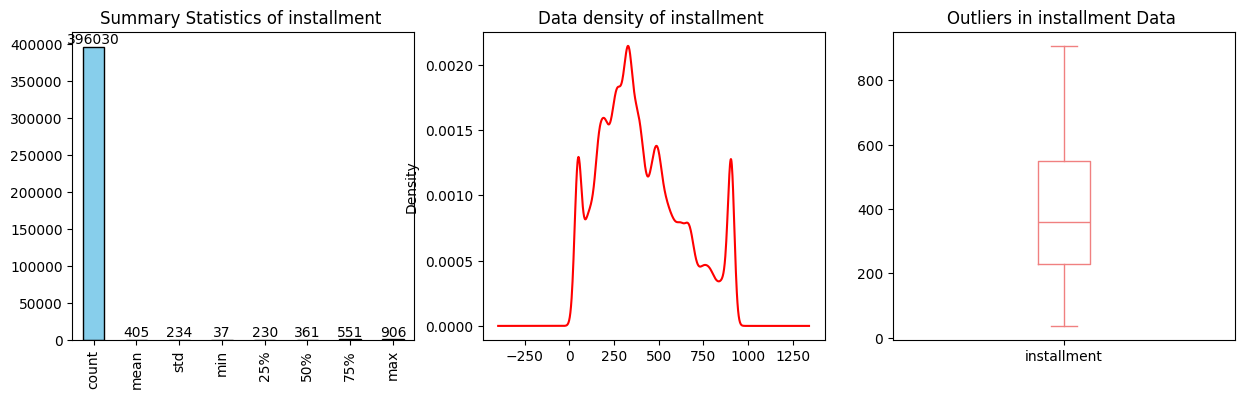

In [622]:
show_detail('installment')

<ipython-input-623-183d443d9cd1>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='installment', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


<Axes: xlabel='installment', ylabel='Density'>

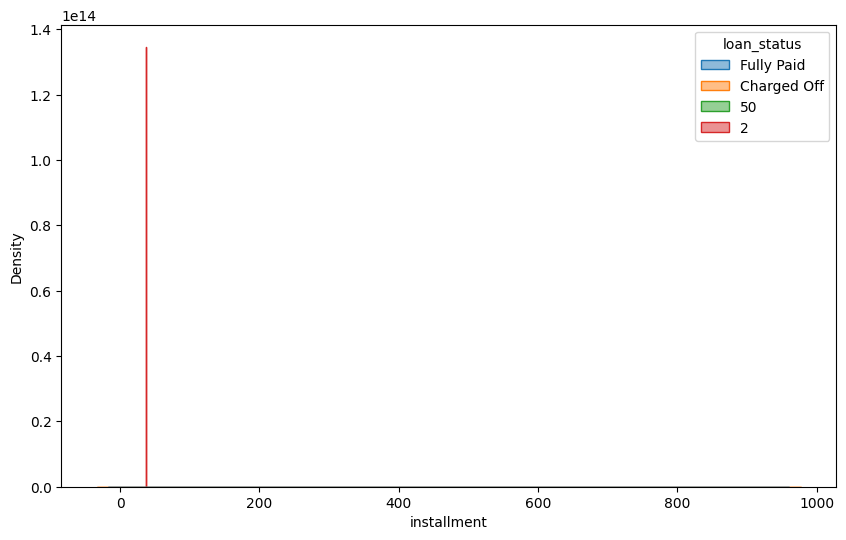

In [623]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='installment', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


Noramalize the annual income column

there is no null value in annual_inc column
Skewness of the data 40.79443858277326




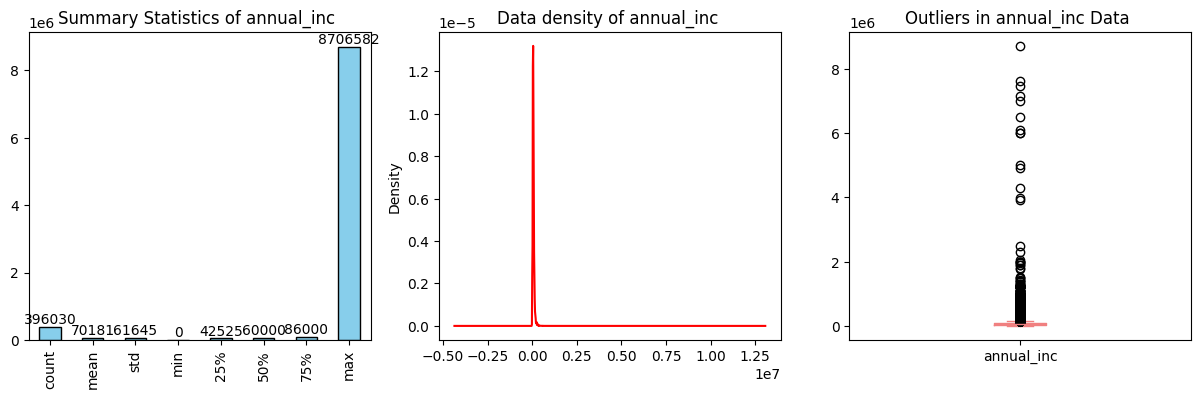

In [624]:
show_detail('annual_inc')

<ipython-input-625-fb28805b72ca>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='annual_inc', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


<Axes: xlabel='annual_inc', ylabel='Density'>

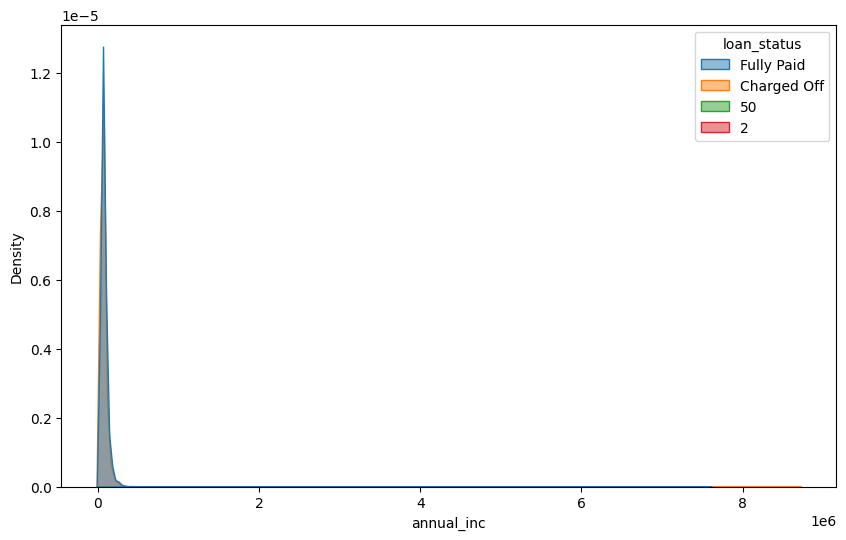

In [625]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='annual_inc', hue='loan_status', fill=True, common_norm=False, alpha=0.5)


In [626]:
lower_percentile = data['annual_inc'].quantile(0.01)  # 1st percentile
upper_percentile = data['annual_inc'].quantile(0.95)  # 99th percentile

# Replace outliers with 95 percentile value of installment column
data['annual_inc'] = data['annual_inc'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in annual_inc column
Skewness of the data 0.567973305515715




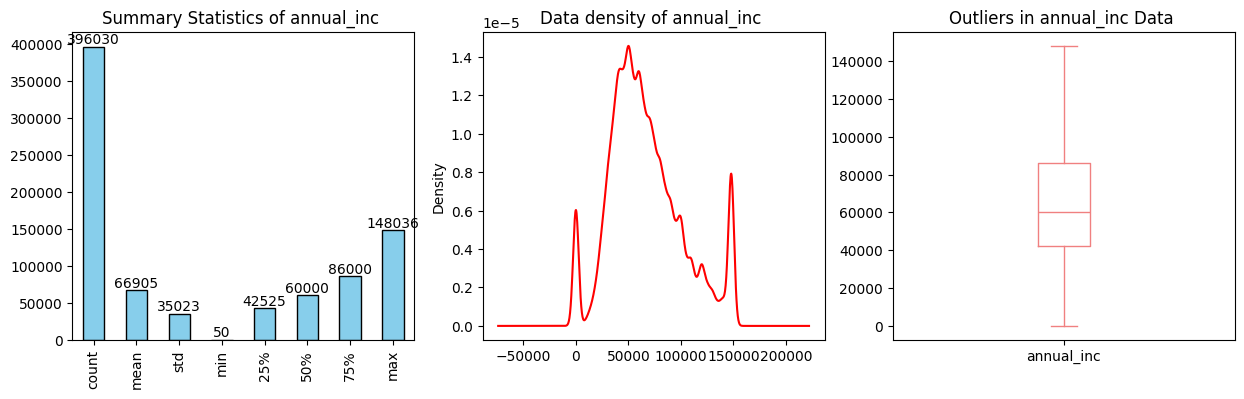

In [627]:
show_detail('annual_inc')

Normalize the dti column

there is no null value in dti column
Skewness of the data 372.0534703129178




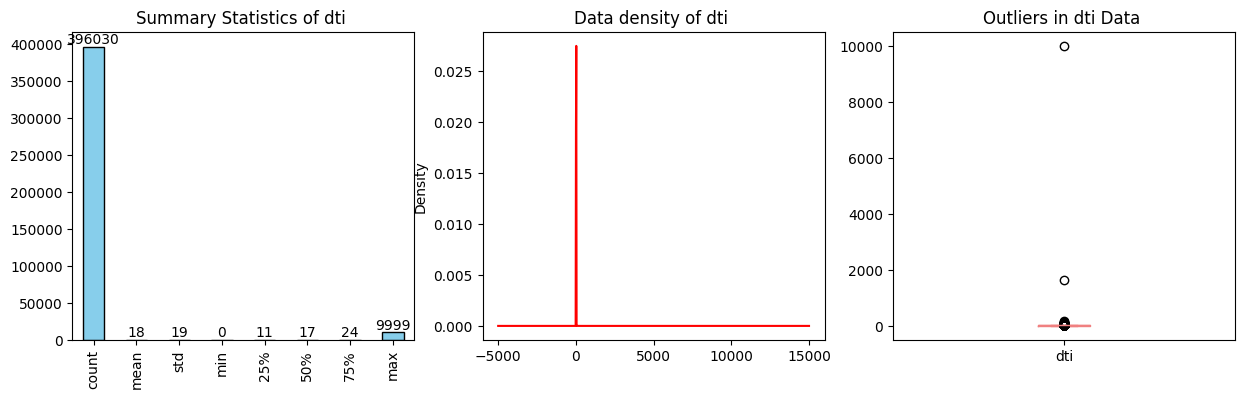

In [628]:
#  showing the detail of dti column

show_detail('dti')

In [629]:
lower_percentile = data['dti'].quantile(0.01)  # 1st percentile
upper_percentile = data['dti'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['dti'] = data['dti'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in dti column
Skewness of the data 0.2375572578410736




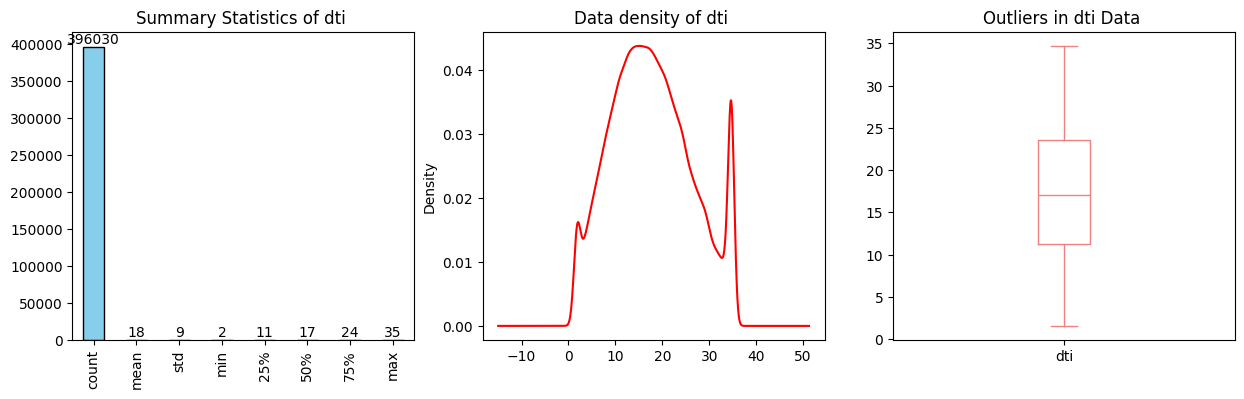

In [630]:
show_detail('dti')

Normalize the open account column
which is containing outliers

there is no null value in open_acc column
Skewness of the data 3.0075294889678865




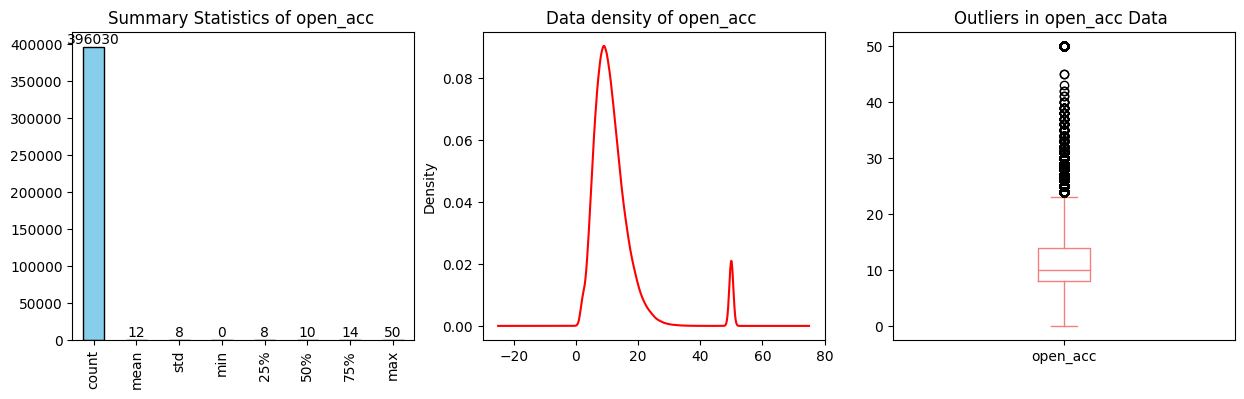

In [631]:
show_detail('open_acc')

In [632]:
lower_percentile = data['open_acc'].quantile(0.01)  # 1st percentile
upper_percentile = data['open_acc'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['open_acc'] = data['open_acc'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in open_acc column
Skewness of the data 0.6873695785273171




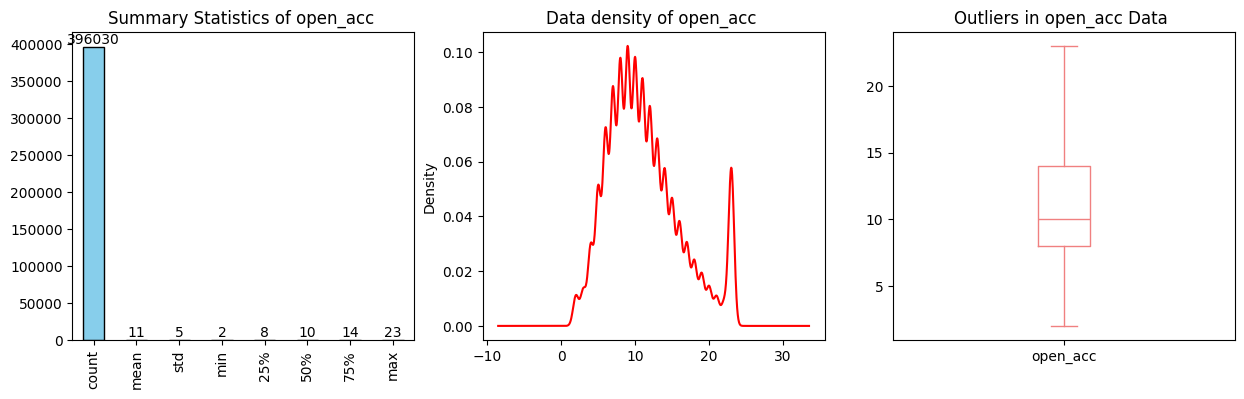

In [633]:
show_detail('open_acc')

Normalize the pub_rec column

there is no null value in pub_rec column
Skewness of the data 5.134480355629944




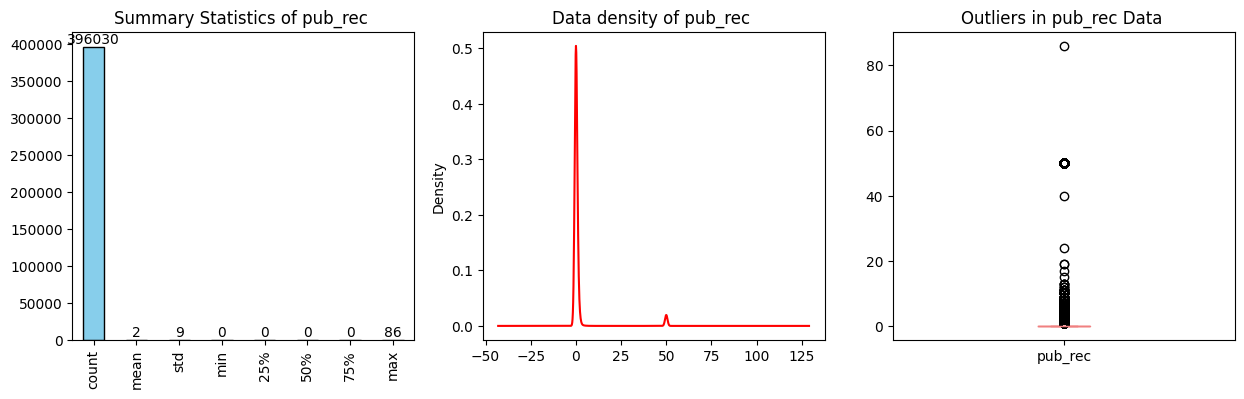

In [634]:
show_detail('pub_rec')

In [635]:
data[data['pub_rec']>0]=1

there is no null value in pub_rec column
Skewness of the data 1.6824004741177039




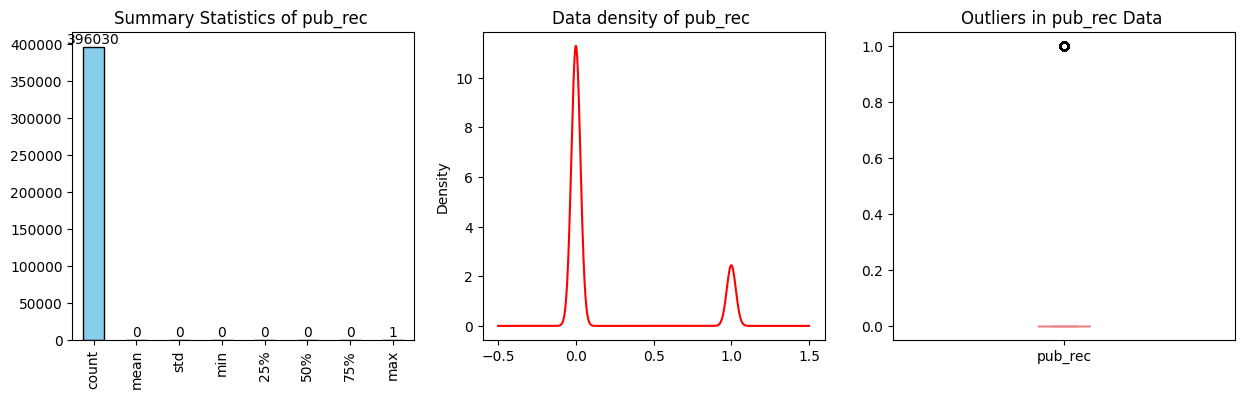

In [636]:
show_detail('pub_rec')

there is no null value in revol_bal column
Skewness of the data 9.566810704982508




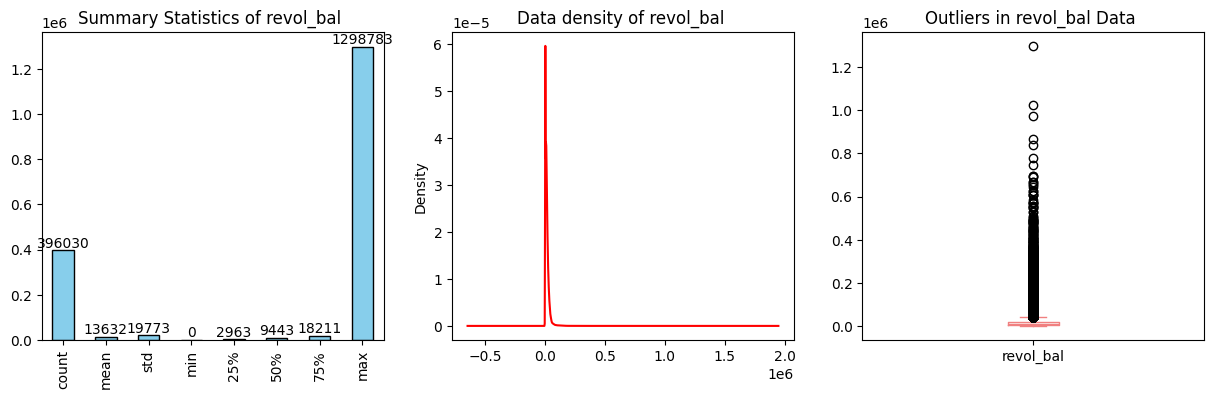

In [637]:
show_detail('revol_bal')

In [638]:
lower_percentile = data['revol_bal'].quantile(0.01)  # 1st percentile
upper_percentile = data['revol_bal'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['revol_bal'] = data['revol_bal'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in revol_bal column
Skewness of the data 0.9300073444354773




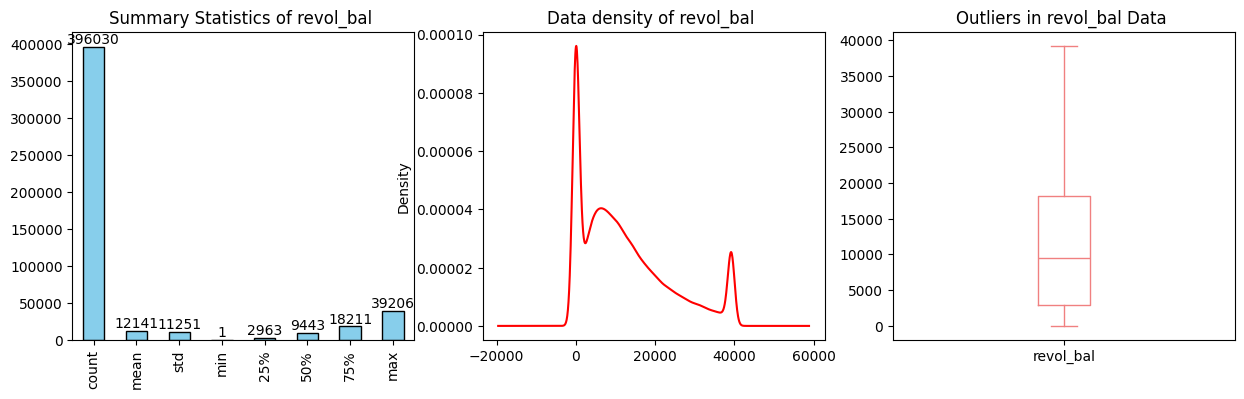

In [639]:
show_detail('revol_bal')

there is no null value in total_acc column
Skewness of the data 0.10388082069252823




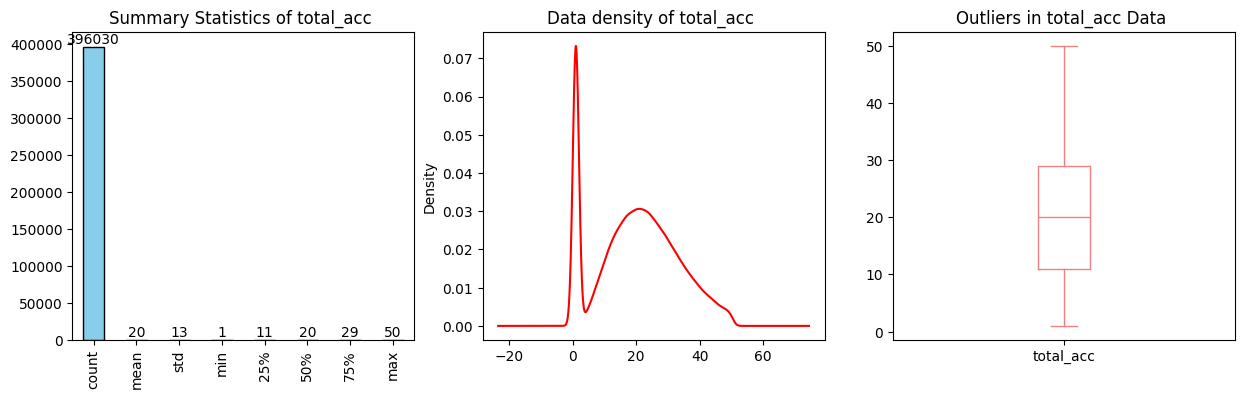

In [640]:
show_detail('total_acc')

In [641]:
lower_percentile = data['total_acc'].quantile(0.01)  # 1st percentile
upper_percentile = data['total_acc'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['total_acc'] = data['total_acc'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in total_acc column
Skewness of the data -0.008584929512645416




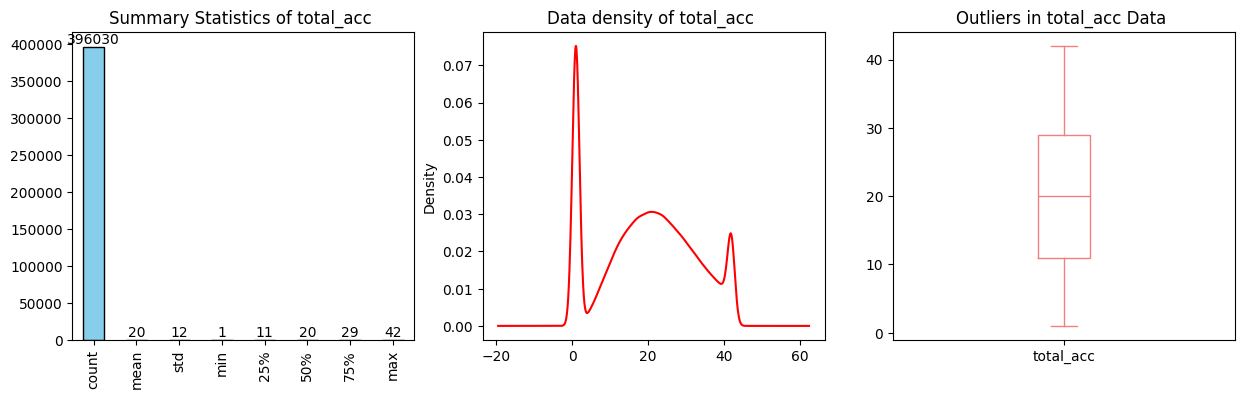

In [642]:
show_detail('total_acc')

In [643]:
numeric_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


there is no null value in revol_util column
Skewness of the data -0.11496684298432955




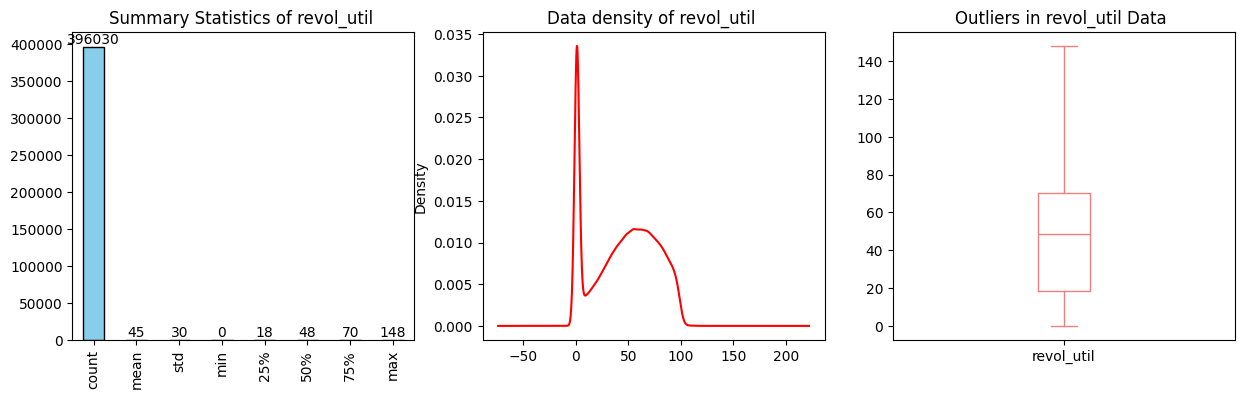

In [644]:
show_detail('revol_util')

In [645]:
lower_percentile = data['revol_util'].quantile(0.01)  # 1st percentile
upper_percentile = data['revol_util'].quantile(0.95)  # 95th percentile

# Replace outliers with 95 percentile value of installment column
data['revol_util'] = data['revol_util'].clip(lower=lower_percentile, upper=upper_percentile)

there is no null value in revol_util column
Skewness of the data -0.15335316044678146




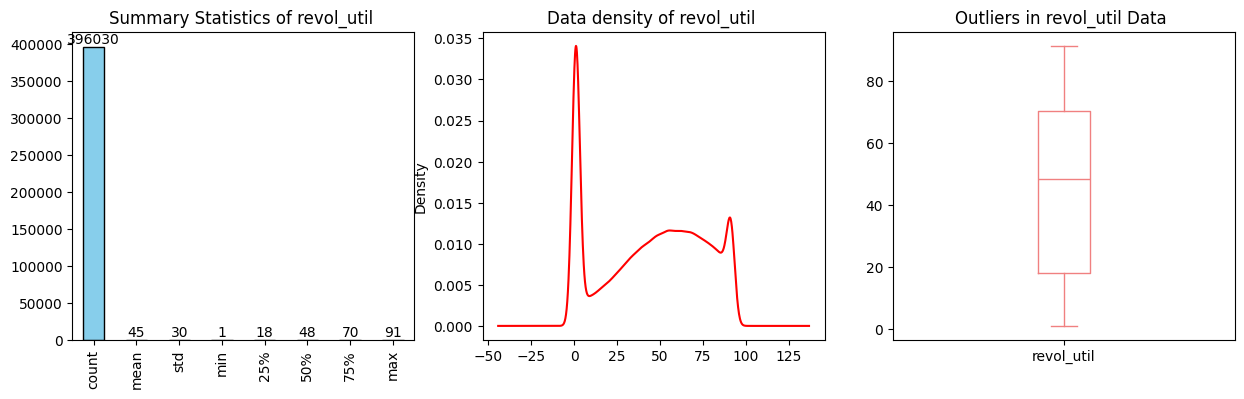

In [646]:

show_detail('revol_util')

In [647]:
data['revol_util']=data['revol_util'].fillna(50)

We have normalize the data

Converting the date columns (issue_d and earliest cr line ) into history length columns

In [648]:

from datetime import datetime

# Convert to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])

# Calculate credit history length in years
current_date = datetime.now()
data['issue_data_history_length'] = (current_date - data['issue_d']).dt.days / 365

data.drop(columns='issue_d',inplace=True) # after creating date history column  delete the issue_d column


<ipython-input-648-ec85b9855ddb>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


In [649]:

data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

# Calculate credit history length in years
current_date = datetime.now()
data['credit_history_length'] = (current_date - data['earliest_cr_line']).dt.days / 365

data.drop(columns='earliest_cr_line',inplace=True)


<ipython-input-649-770a4aebdebb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [666]:
data.select_dtypes(exclude='number').head()

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,purpose,title,initial_list_status,application_type
0,B,B4,Marketing,10+ years,RENT,Not Verified,Fully Paid,vacation,Vacation,w,INDIVIDUAL
1,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,f,INDIVIDUAL
2,B,B3,Statistician,< 1 year,RENT,Source Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL
3,A,A2,Client Advocate,6 years,RENT,Not Verified,Fully Paid,credit_card,Credit card refinancing,f,INDIVIDUAL
4,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Charged Off,credit_card,Credit Card Refinance,f,INDIVIDUAL


In [660]:
data['term'] = data['term'].apply(lambda x: int(str(x)[:3]))



In [669]:
encoder=LabelEncoder()

for col in data.select_dtypes(exclude='number'):
  data[col] = data[col].apply(lambda x: str(x) if isinstance(x, (int, float)) else x)

  data[col]=encoder.fit_transform(data[col])

In [670]:
x=data.drop(columns='loan_status')
y=data['loan_status']

In [671]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [672]:
model=LogisticRegression()

In [673]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [677]:
prediction =model.predict(x_test)

In [678]:
accuracy=accuracy_score(y_test,prediction)

In [680]:
scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.84012575 0.84055501 0.84032775 0.84028988 0.84011312]
Mean accuracy: 0.8402823018458199


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [681]:
scores.mean()

0.8402823018458199

In [ ]:


- **EDA Highlights:** Significant patterns were observed in applicant income, credit history, and loan amounts that correlate with loan status.
- **Model Performance:** Among the models tested, [Best Model] demonstrated superior performance with an accuracy of [X]% and an F1 score of [Y].
- **Recommendations:**
  1. Focus on collecting additional data related to credit history for improved predictions.
  2. Implement the best-performing model in production systems for real-time loan status prediction.

This notebook serves as a foundation for further improvements and integrations.
